In [2]:
import pandas as pd

column_names = ["user_id", "item_id", "rating", "timestamp"]

df = pd.read_csv("ml-100k/u.data", sep="\t", names=column_names)

In [3]:
df.head(3)
#user_id and item_id are nominal data (categoric), rating is ordinal data (categoric) and timestamp is continous data (numeric)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [4]:
#All integers
df.dtypes

user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object

In [5]:
#4 columns and 100000 rows
df.shape

(100000, 4)

In [14]:
#There are no null values
df.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [23]:
#Convert timestamp
from datetime import date

df["new_date"] = df["timestamp"].apply(lambda x: date.fromtimestamp(x))

df.head(3)

,user_id,item_id,rating,timestamp,new_date
0,196,242,3,881250949,1997-12-04
1,186,302,3,891717742,1998-04-04
2,22,377,1,878887116,1997-11-07


In [25]:
#Drop timestamp column
df.drop(columns=["timestamp"], inplace=True)

In [30]:
df.head(3)

,user_id,item_id,rating,new_date
0,196,242,3,1997-12-04
1,186,302,3,1998-04-04
2,22,377,1,1997-11-07


C:\Users\omerf\AppData\Local\Temp\ipykernel_14396\3099276625.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "rating" , data=df, palette="coolwarm")


<Axes: title={'center': 'Number of Movies by Their Rating'}, xlabel='Rating', ylabel='Count'>

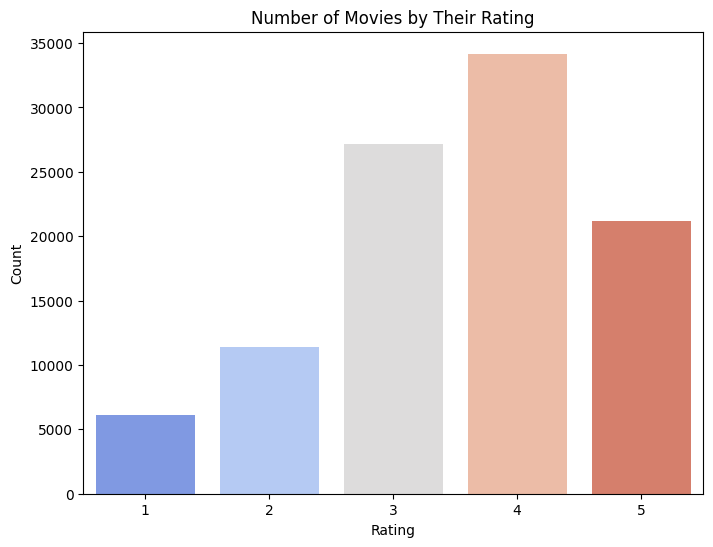

In [48]:
#A graph for fun
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("Number of Movies by Their Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
sns.countplot(x = "rating" , data=df, palette="coolwarm")


#Most of the movies have 4 ratings

In [45]:
#Split dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df[["user_id", "item_id"]]
y = df["rating"]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Model Review

I read these 2 articles on Medium to get started, explains item-based and user-based collaborative filtering in a simple way - https://medium.com/@cfpinela/recommender-systems-user-based-and-item-based-collaborative-filtering-5d5f375a127f , https://medium.com/@iremcilingir/%C3%B6neri-sistemleri-recommendation-systems-28a3f341c0a9

After that I read this article for further explanation - https://onlinelibrary.wiley.com/doi/full/10.1155/2009/421425

For matrix factorization I read this post on Medium - https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b


